
- [selecting columns](#selecting-columns)
- [cleaning](#cleaning-the-data)
- [Visualization](#Visualization)
- [Model one](#model-bulding)
- [Model two](#model-bulding-2)

In [3]:
#import needed libarys 
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
# from bokeh.plotting import figure, show, output_file
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
from sklearn.linear_model import LinearRegression
import pandas_profiling 
import time 

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [4]:
# loading the csv  amd check for the time it takes to load 
times = time.time() 
df= pd.read_csv('2015.csv')
time.time() - times


15.997234582901001

In [5]:
df.shape

(441456, 330)

In [6]:
pd.options.display.max_columns = 500


####  selecting columns 

In [7]:
df = df.filter(['SEX', '_AGE80', 'MARITAL', 'EDUCA', 'EMPLOY1', 'INCOME2', 'WEIGHT2', 'HEIGHT3',  'GENHLTH', 'MENTHLTH', 'POORHLTH',  'MEDCOST', 'SCNTWRK1',  'BPHIGH4', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ADDEPEV2', 'DIABETE3', 'CVDASPRN', 'LSATISFY', 'ADANXEV', '_SMOKER3', '_RFDRHV5', 'PA1MIN_','_LMTSCL1'], axis=1)

In [8]:
df.shape

(441456, 27)

In [9]:
# rename columens 
new_columens = {'SEX':'Sex',
                '_AGE80':'Age',
                'MARITAL': 'Marital status',
                'EDUCA':'Education',
                'EMPLOY1': 'Employed',
                'INCOME2': 'Income',
                'WEIGHT2': 'Weight',
                'HEIGHT3': 'Height',
                'GENHLTH': 'General Health',
                'MENTHLTH': 'Mental Health',
                'POORHLTH': 'Poor Health',
                'MEDCOST': 'Medical Cost',
                'SCNTWRK1': 'Hours of Work',
                'BPHIGH4': 'High Blood Preasure',
                'TOLDHI2': 'High Cholesterol',
                'CVDINFR4': 'Heart Attack',
                'CVDCRHD4': 'Coronary Heart DIS',
                'CVDSTRK3': 'Stroke',
                'ADDEPEV2': 'Depression',
                'DIABETE3': 'Diabetes',
                'CVDASPRN': 'Takes Aspirin',
                'LSATISFY': 'Life Satisfaction',
                'ADANXEV': 'Anxity',
                '_SMOKER3': 'Smoke',
                '_RFDRHV5': 'Heavy Drinker',
                'PA1MIN_': 'Minitues of PHISCACVTV',
                '_LMTSCL1': 'social activities',}

In [10]:
df.rename(columns=new_columens, inplace=True)

In [11]:
# الطريقة هذي افضل عشان ماتتلخبط الكولمز
df.columns = df.columns.str.replace(' ','_')

In [12]:
df.describe().T.style

,count,mean,std,min,25%,50%,75%,max
Sex,441456,1.57654,0.494107,1,1,2,2,2
Age,441456,55.4099,17.0416,18,43,58,69,80
Marital_status,441456,2.26365,1.68784,1,1,1,3,9
Education,441456,4.92009,1.0762,1,4,5,6,9
Employed,441456,3.94277,2.87177,1,1,3,7,9
Income,438155,20.253,31.8535,1,5,7,8,99
Weight,436141,733.204,2197.38,50,149,175,210,9999
Height,435545,742.183,1380.5,200,504,507,510,9999
General_Health,441454,2.57879,1.11758,1,2,2,3,9
Mental_Health,441456,64.6792,35.8431,1,28,88,88,99


### cleaning the data 
##### removing rows that have 9 or any number indicate for null values 

In [13]:
df = df.query('Marital_status != 9') 

In [14]:
df = df.query('Smoke != 9') 

In [15]:
df = df.query('Education != 9') 

In [16]:
df = df.query('Employed != 9') 


In [17]:
df = df.query('Income != 77')
df = df.query('Income != 99') 

In [18]:
df = df.query('General_Health != 7')
df = df.query('General_Health != 9') 

In [19]:
df = df.query('Mental_Health != 77')
df = df.query('Mental_Health != 99')

In [20]:
df = df.query('Poor_Health != 77')
df = df.query('Poor_Health != 88')
df = df.query('Poor_Health != 99') 

In [21]:
df = df.query('Medical_Cost != 7') 
df = df.query('Medical_Cost != 9')

In [22]:
df = df.query('Hours_of_Work != 97')
df = df.query('Hours_of_Work != 98') 
df = df.query('Hours_of_Work != 99') 
df = df.query('High_Blood_Preasure != 7')
df = df.query('High_Blood_Preasure != 9')
df = df.query('Diabetes != 7')
df = df.query('Diabetes != 9')
df = df.query('High_Cholesterol != 7')
df = df.query('High_Cholesterol != 9')

In [23]:
df = df.query('Heart_Attack != 7')
df = df.query('Heart_Attack != 9')
df = df.query('Coronary_Heart_DIS != 7')
df = df.query('Coronary_Heart_DIS != 9')
df = df.query('Stroke != 7')
df = df.query('Stroke != 9')
df = df.query('Depression != 7')
df = df.query('Depression != 9')
df = df.query('Takes_Aspirin != 7')
df = df.query('Takes_Aspirin != 9')
df = df.query('Anxity != 7')
df = df.query('Anxity != 9')
df = df.query('Life_Satisfaction != 7')
df = df.query('Life_Satisfaction != 9')
df = df.query('Heavy_Drinker != 9')
df = df.query('social_activities != 9')


#### change values to be 0 or 1  yes or no  


In [24]:
# 1
# No Notes: BPHIGH4 = 2 or 3 or 4
# 2
# Yes Notes: BPHIGH4 = 1
df['High_Blood_Preasure'].values[df['High_Blood_Preasure'].values == 2] = 0
df['High_Blood_Preasure'].values[df['High_Blood_Preasure'].values == 3] = 0
df['High_Blood_Preasure'].values[df['High_Blood_Preasure'].values == 4] = 0

In [25]:
# 2 = Yes, but female told only during pregnancy
# 3 = No
# 4 = No, pre-diabetes or borderline diabetes
df['Diabetes'].values[df['Diabetes'].values == 2] = 0
df['Diabetes'].values[df['Diabetes'].values == 3] = 0
df['Diabetes'].values[df['Diabetes'].values == 4] = 0

In [26]:
df['High_Cholesterol'].values[df['High_Cholesterol'].values == 2] = 0

In [27]:
# 2
# Divorced
# 3
# Widowed
# 4
# Separated
# 5
# Never married
# 6
# A member of an unmarried couple
df['Marital_status'].values[df['Marital_status'].values > 1] = 0


In [28]:
# 2 indicate to No 

df['Heart_Attack'].values[df['Heart_Attack'].values == 2] = 0

In [29]:
# 2 indicate to No 

df['Coronary_Heart_DIS'].values[df['Coronary_Heart_DIS'].values == 2] = 0

In [30]:
# 2 indicate to No 

df['Stroke'].values[df['Stroke'].values == 2] = 0

In [31]:
# 2 indicate to No 

df['Depression'].values[df['Depression'].values == 2] = 0

In [32]:
# 2 indicate to No 

df['Takes_Aspirin'].values[df['Takes_Aspirin'].values == 2] = 0

In [33]:
# 88 indicate to not having Mental Health Not Good
df['Mental_Health'].values[df['Mental_Health'].values == 88] = 0

In [34]:
# 2 indicate to No 
df['Medical_Cost'].values[df['Medical_Cost'].values == 2] = 0

In [35]:
#change it to be both Employed for wages and self Employed have the same value   
df['Employed'].values[df['Employed'].values == 2] = 1
# student or Retired ...etc 
df['Employed'].values[df['Employed'].values > 2] = 0


In [36]:
# 2 = don't have Anxity 
df['Anxity'].values[df['Anxity'].values == 2] = 0

In [37]:
# 2 = female 
df['Sex'].values[df['Sex'].values == 2] = 0

In [38]:
# 1 = no 
df['Heavy_Drinker'].values[df['Heavy_Drinker'].values == 1] = 0
# 2 = yes 
df['Heavy_Drinker'].values[df['Heavy_Drinker'].values == 2] = 1

##### check for null values 
###### That’s a lot of missing values per column

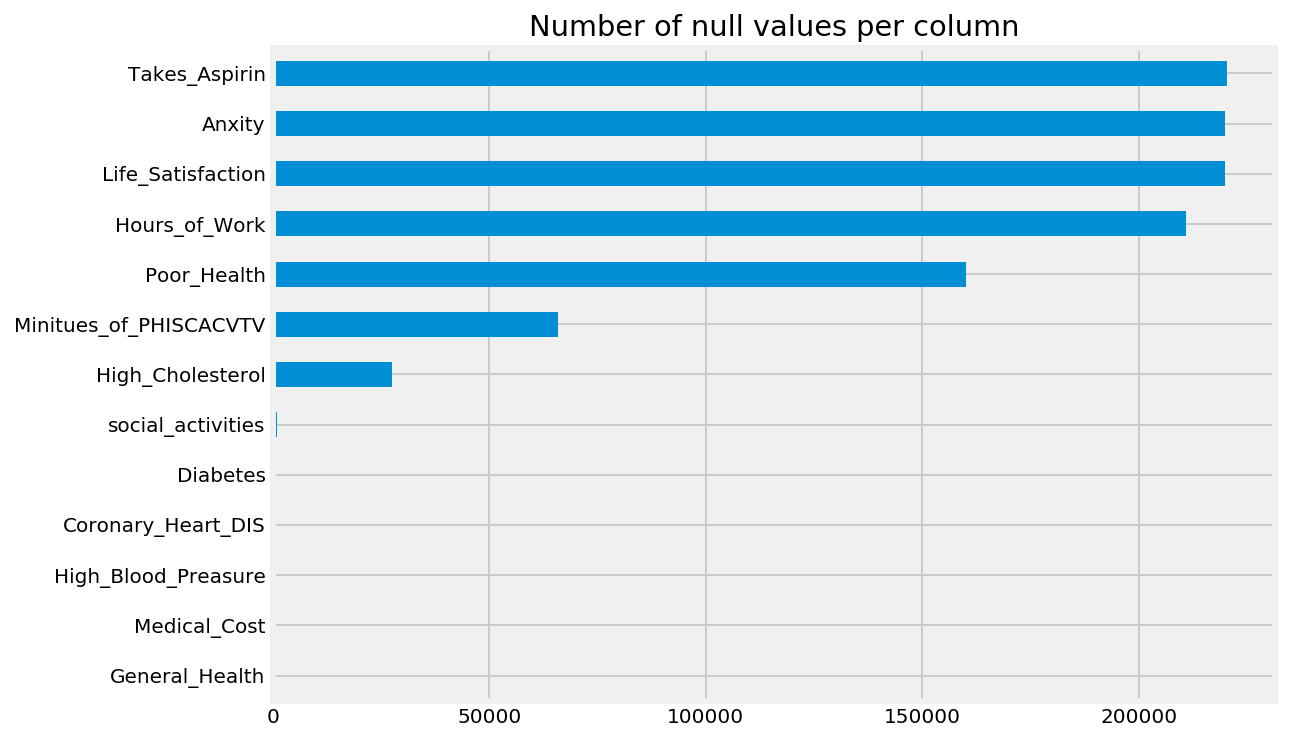

In [39]:
plt.figure(figsize=(8,6))
df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending=True)\
.plot(kind='barh');
plt.title('Number of null values per column');

#### cleaning the Weight column

In [40]:
# replace these numbers with null as its means 7777 =Don’t know/Not sure 9999=Refused
df.Weight=df.Weight.map(lambda x :np.nan if x== 9999 or x==7777 else x)

In [41]:
# convert killograms to pounds as kilograms repsented as 9 and the value in kilograms 
df.Weight=df.Weight.map(lambda x : (x-9000)*2.20462262  if x>= 9000 else x)

In [42]:
# Imputing mean for Weight column misssing values 
df['Weight'] = df.groupby(["Sex", 'Age'])["Weight"]\
.transform(lambda x: x.fillna(x.mean()))


#### cleaning the height column
The height rows were recorded in centemeters E.g. (190) and feet and inches E.g. (507) meaning 5 feet and 7 inches.
Most the rows were taken in feet and inches. So, we decided to convert the values in centemeters to feet and inches.

In [43]:
# Calculating the ratio for men and women
gender_mean = df.Sex.mean()
men_d =  gender_mean
wom_d = 1 - gender_mean

In [44]:
# We intreduced the American average men and women height [509, 504] and came up with an average for both
#     based on gender ratio in our data.
avg_m_h = 509 * men_d
avg_w_h = 504 * wom_d
avg_h_h = avg_m_h + avg_w_h
height_mean = (int(avg_h_h)) 

In [45]:
# This function takes two values and combine them E.g. the output of 5 feet and 10 inches (5, 10) will be (510).
import math
def match_data(x, y):
    a = math.floor(math.log10(y))
    return int(x*10**(1+a)+y)


In [46]:
# This function imputes the mean for the missing values and outputs the metric values in inches and feet to match the
#    data we have.
def convert_height(y):
    H = y
    if y == 7777:
        x = height_mean
        H= x
    elif y == 9999:
        x = height_mean
        H= x
    elif y > 9000 and y < 9999:
        x= y - 9000
        x= x / 100
        meters_ft = (x // .3048) * 10
        meters_in =  x / .3048 % 1 * 12
        if meters_in > 9:
            meters_ft = meters_ft /10
        x = match_data((meters_ft), (meters_in))  
        H = x
        
    return H

In [47]:
# This function corrects some outputs of the previous function. With the previous function there is a little chance
#   some converted values will be in feet only or will have inches less than 10. In some cases the output of the 
#   convert_height function will be somthing like (5) meaning five feet. It could also returns (60) meaning 6 feet.
#  Also, it could result (69), which is 6 feet and 9 inches. This function will correct for that.
def correct_height(y):
    x = y
    if y < 100 and y > 10:
        if y > 40 and y < 50:
            a = y - 40
            z = y / 10
            z = int(z) * 10
            d = match_data(z, a)
            x = d
        elif y > 50 and y < 60:
            a = y - 50
            z = y / 10
            z = int(z) * 10
            d = match_data(z, a)
            x = d
        elif y > 30 and y < 40:
            a = y - 30
            z = y / 10
            z = int(z) * 10
            d = match_data(z, a)
            x = d    
        elif y > 60 and y < 70:
            a = y - 60
            z = y / 10
            z = int(z) * 10
            d = match_data(z, a)
            x = d
        elif y > 70 and y < 80:
            a = y - 70  
            z = y / 10
            z = int(z) * 10
            d = match_data(z, a)
            x = d
        elif y == 20 or y == 30 or y == 40 or y == 50 or y == 60 or y == 70:
            y = y * 10
            x= y
        return x
        
    elif y < 10:
        y = y * 100
        x = y
        
    return x    
correct_height(50)

500

In [48]:
df['Height'] = df.apply(lambda x: convert_height(x['Height']),axis=1)

In [49]:
df['Height'] = df.apply(lambda x: correct_height(x['Height']),axis=1)

##### Checking for null values 


In [50]:
# convert from m to h  h:m 
df.Minitues_of_PHISCACVTV= pd.to_datetime(df.Minitues_of_PHISCACVTV, unit='m').dt.strftime('%H:%M')
df.Hours_of_Work= pd.to_datetime(df.Hours_of_Work, unit='h').dt.strftime('%H:%M')



In [51]:
df.isnull().sum()[df.isnull().sum()!=0]

General_Health              1
Poor_Health            160071
Medical_Cost                1
High_Blood_Preasure         1
High_Cholesterol        27628
Coronary_Heart_DIS          1
Diabetes                    2
Takes_Aspirin          220422
Life_Satisfaction      219868
Anxity                 219910
social_activities         938
dtype: int64

##### removing the null values 

In [52]:
# DF without hugly missing values
df = df.filter(['Sex', 'Age', 'Marital_status', 'Education', 'Employed', 'Income', 'Weight',
       'Height','General_Health','Mental_Health',
       'Medical_Cost', 'High_Blood_Preasure',
       'High_Cholesterol', 'Heart_Attack', 'Coronary_Heart_DIS', 'Stroke',
       'Depression', 'Diabetes',
       'Smoke', 'Heavy_Drinker','social_activities'], axis=1)

In [53]:
df.dropna(inplace=True)

In [54]:
# to read the data better 
df=df.astype(int)

In [55]:
# df.describe()
df.isnull().sum()

Sex                    0
Age                    0
Marital_status         0
Education              0
Employed               0
Income                 0
Weight                 0
Height                 0
General_Health         0
Mental_Health          0
Medical_Cost           0
High_Blood_Preasure    0
High_Cholesterol       0
Heart_Attack           0
Coronary_Heart_DIS     0
Stroke                 0
Depression             0
Diabetes               0
Smoke                  0
Heavy_Drinker          0
social_activities      0
dtype: int64

In [56]:
# General_Health scale adjustment to start with the worst = 1 to the best=5
df.General_Health.replace([1, 2, 3, 4, 5], [5, 4, 3, 2, 1], inplace=True)

In [57]:
#  Smoke scale adjustment to start with never smoked=0, had smoked=1, smoke between now and then= 2, smoke regularly 3
df.Smoke.replace([1, 2, 3, 4], [3, 2, 1, 0], inplace=True)

### Visualization

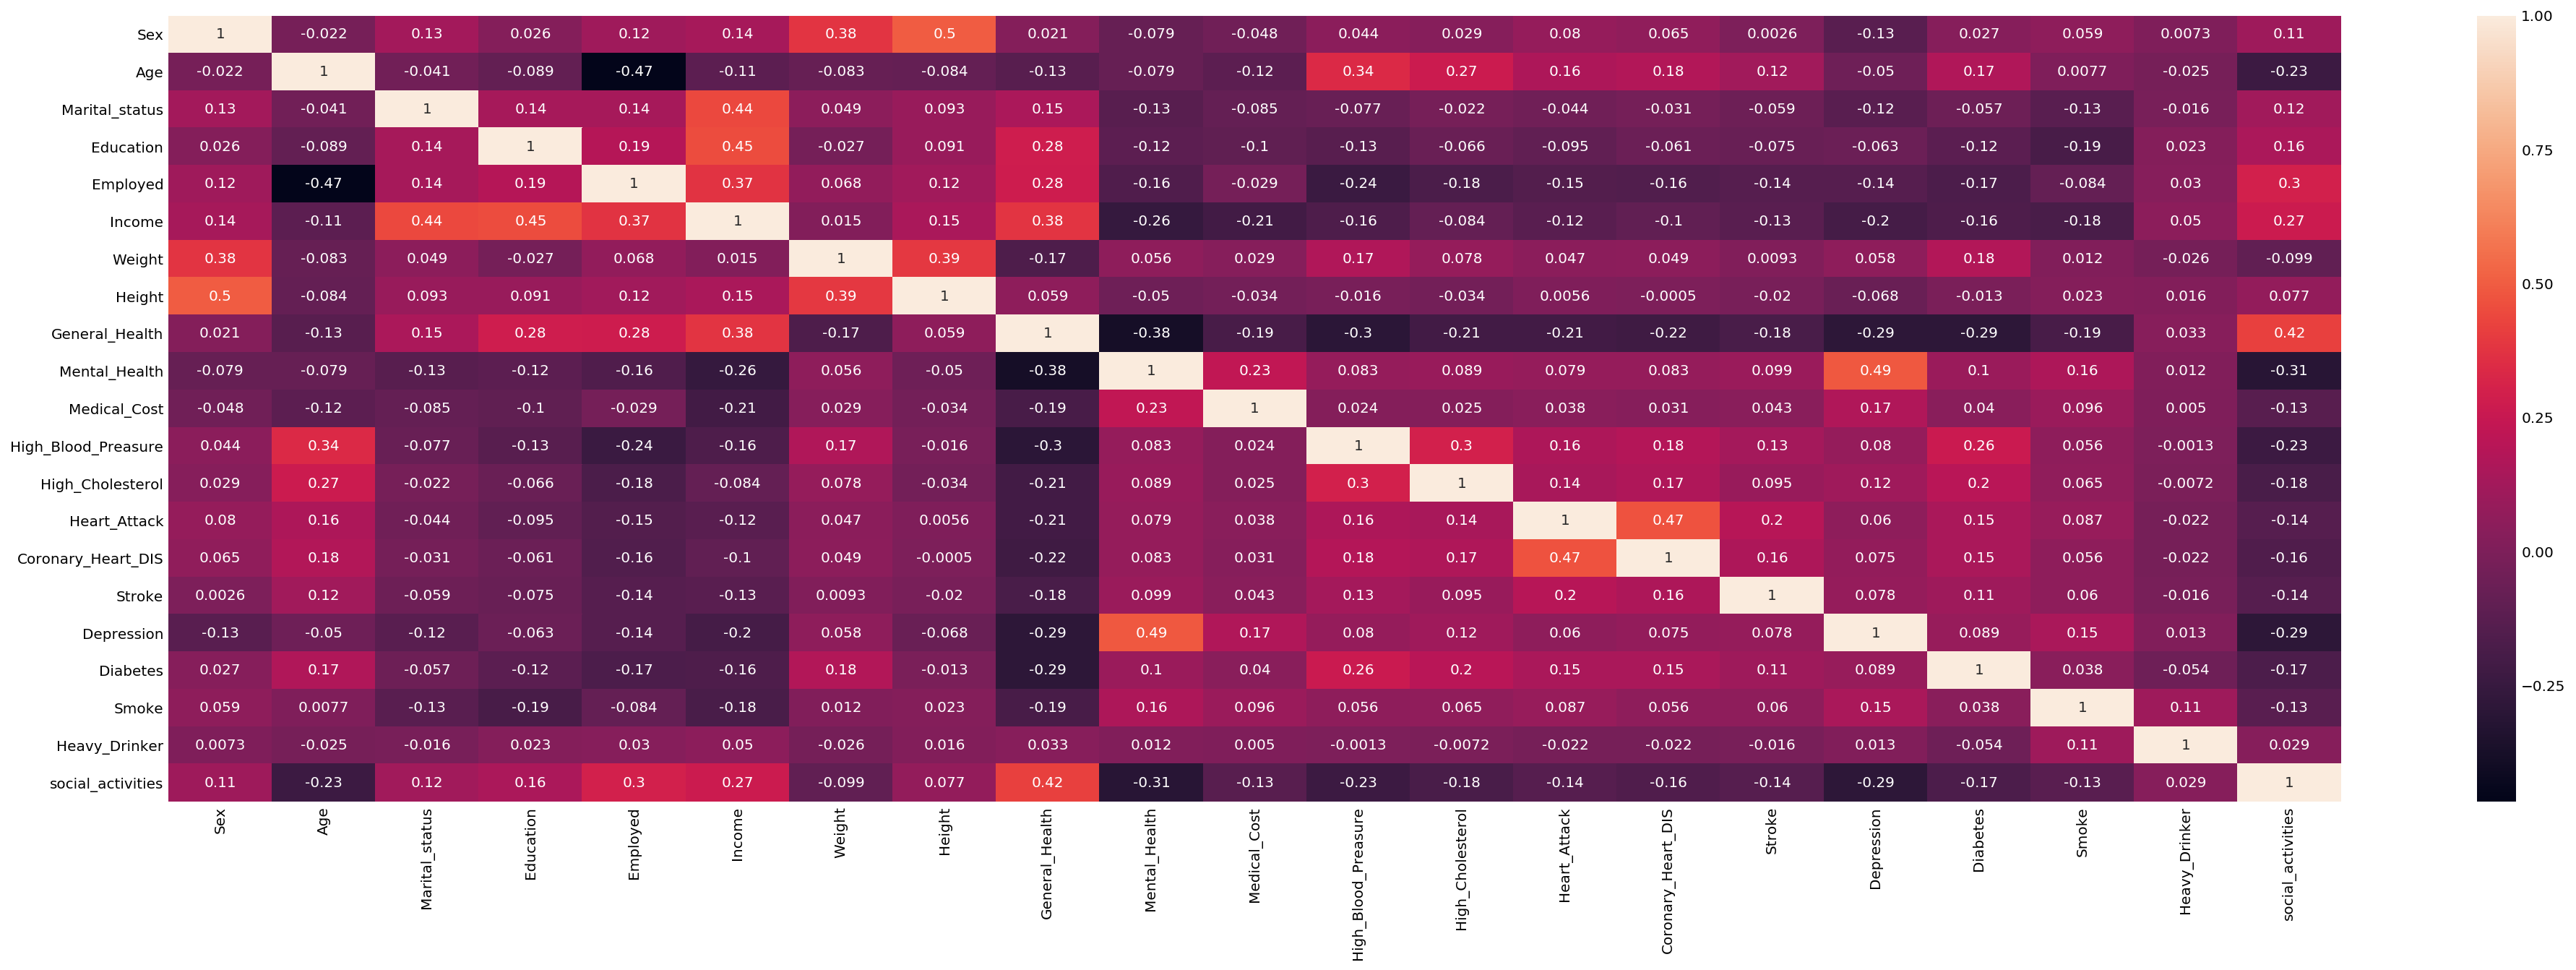

In [58]:
plt.figure(figsize=(30,10))
sns.heatmap(df.corr() ,annot=True);


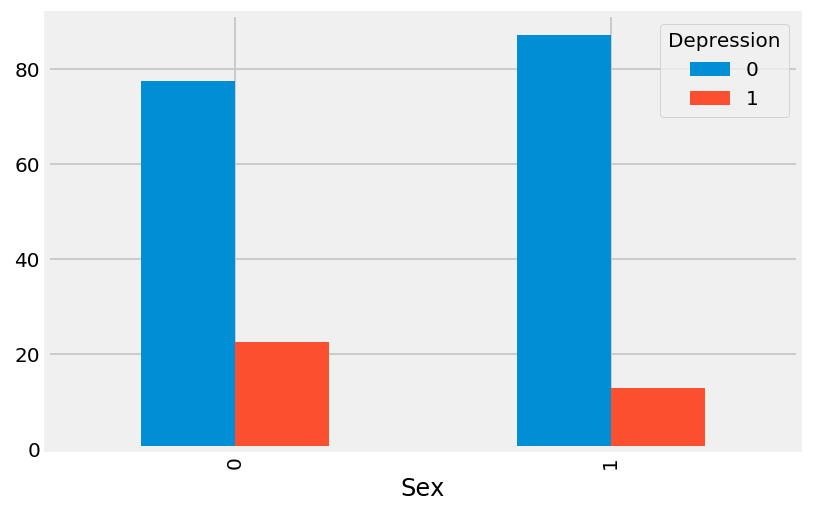

In [59]:
pd.crosstab( df.Sex,df.Depression ,normalize='index').mul(100).plot(kind='bar');

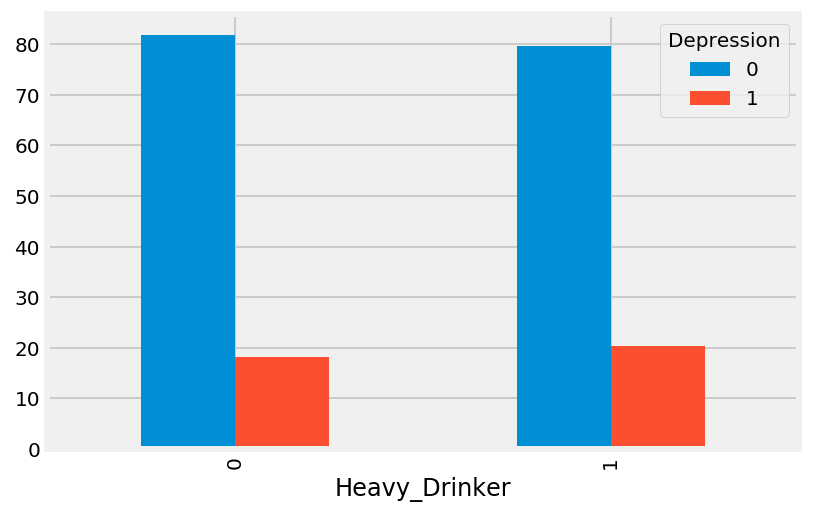

In [60]:
pd.crosstab( df.Heavy_Drinker,df.Depression ,normalize='index').mul(100).plot(kind='bar');

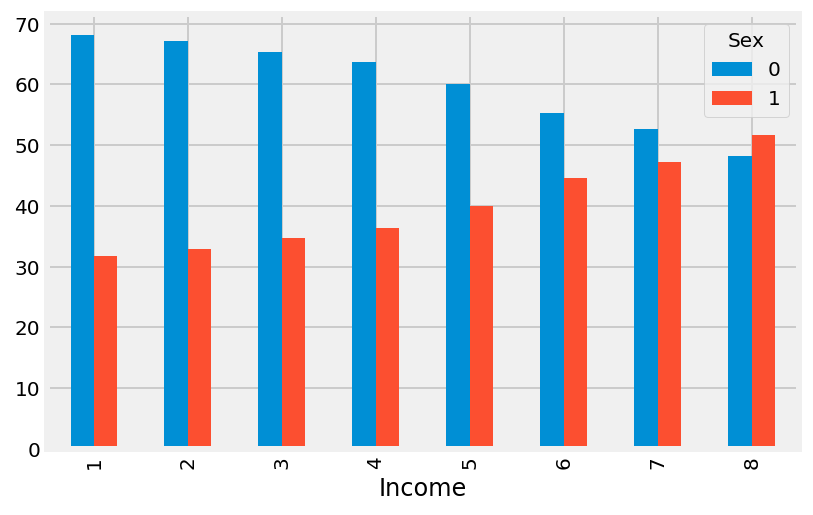

In [61]:
pd.crosstab(df.Income,df.Sex ,normalize='index').mul(100).plot(kind='bar');


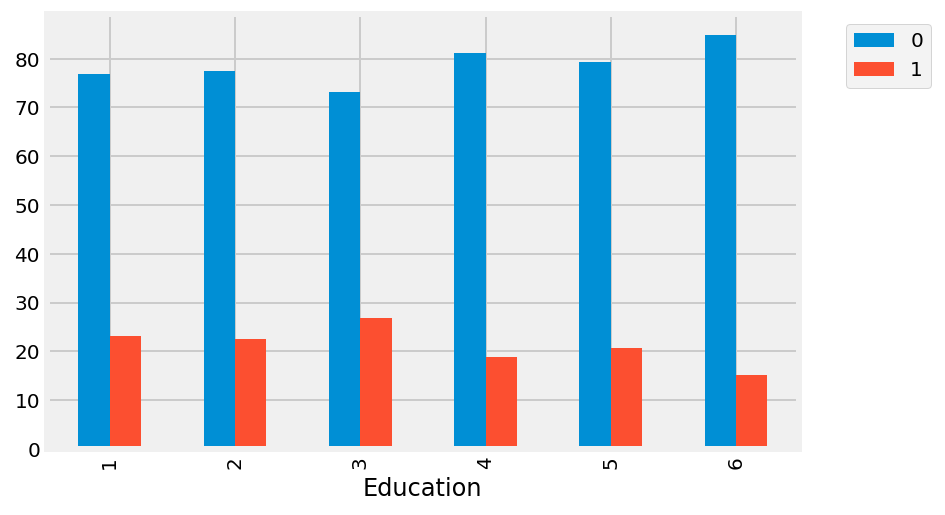

In [62]:
# df.groupby('Depression')['Employed'].sum().plot(kind='pie',autopct='%1.1f%%');
pd.crosstab(df.Education,  df.Depression,normalize='index').mul(100).plot(kind='bar');
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left');


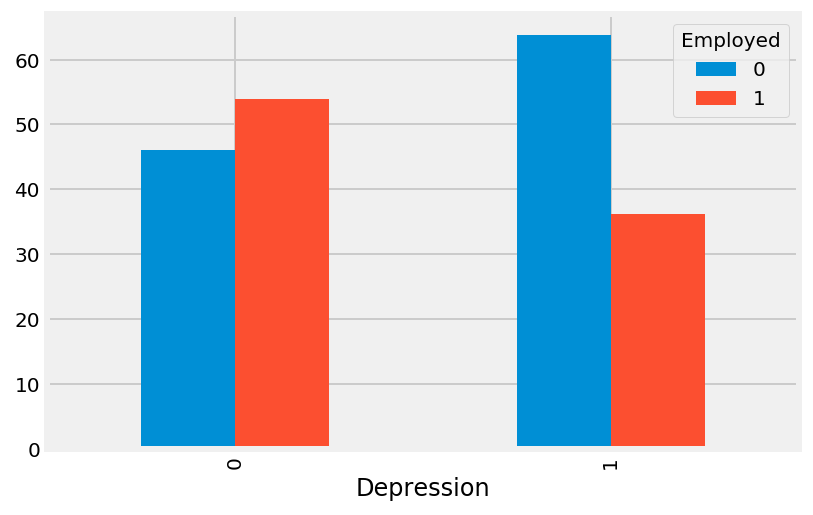

In [63]:
pd.crosstab( df.Depression,df.Employed ,normalize='index').mul(100).plot(kind='bar');


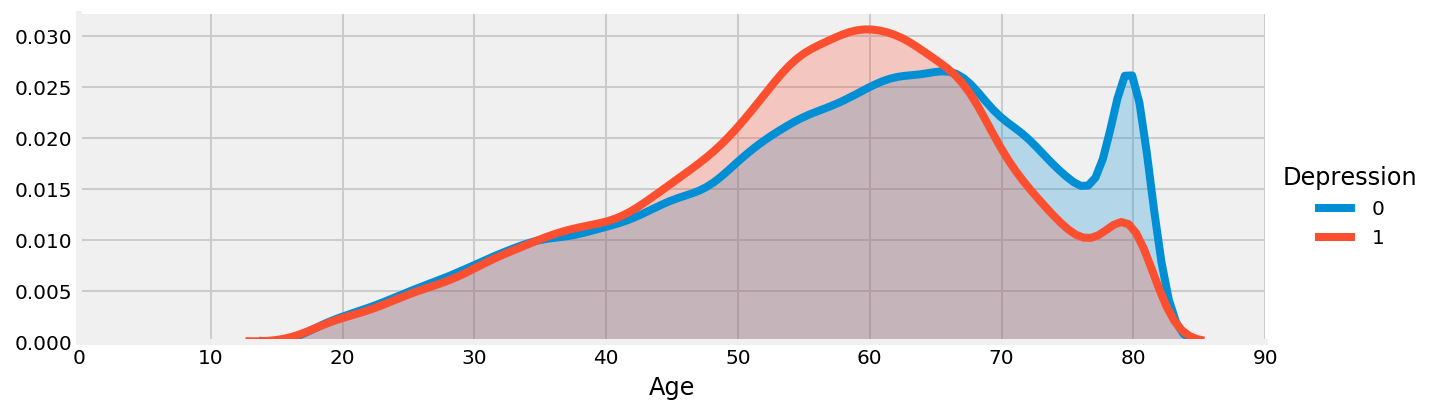

In [64]:
s = sns.FacetGrid(df, hue='Depression', aspect=3, legend_out=True)
s.map(sns.kdeplot, "Age", shade=True).add_legend()
s.set(xlim=(0, 90));

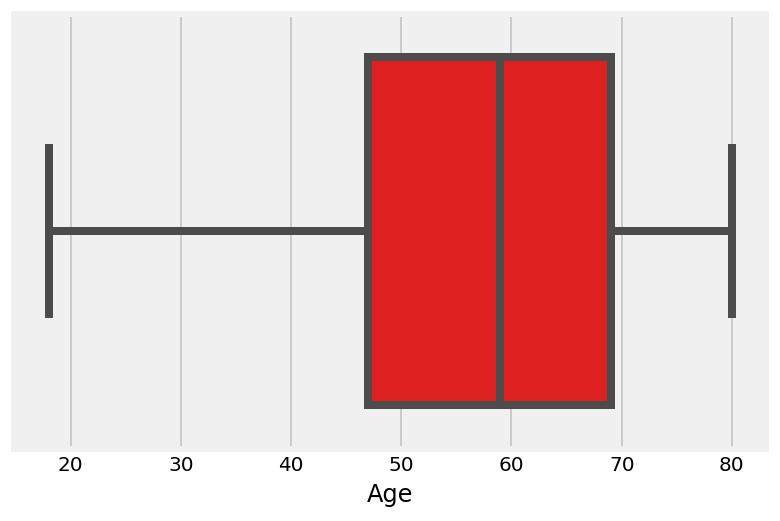

In [65]:
sns.boxplot(data=df,x=df.Age,color='red');

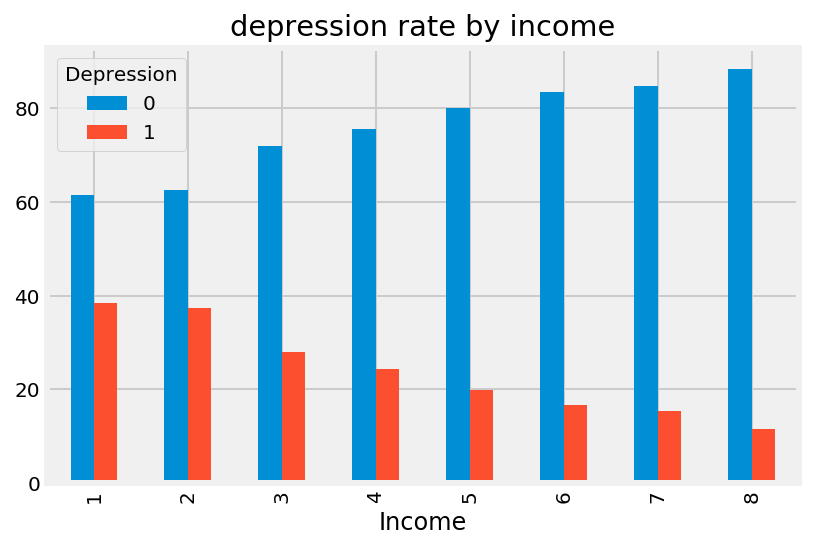

In [66]:
pd.crosstab(df.Income,df.Depression,normalize='index').mul(100).plot(kind='bar');
plt.title('depression rate by income');

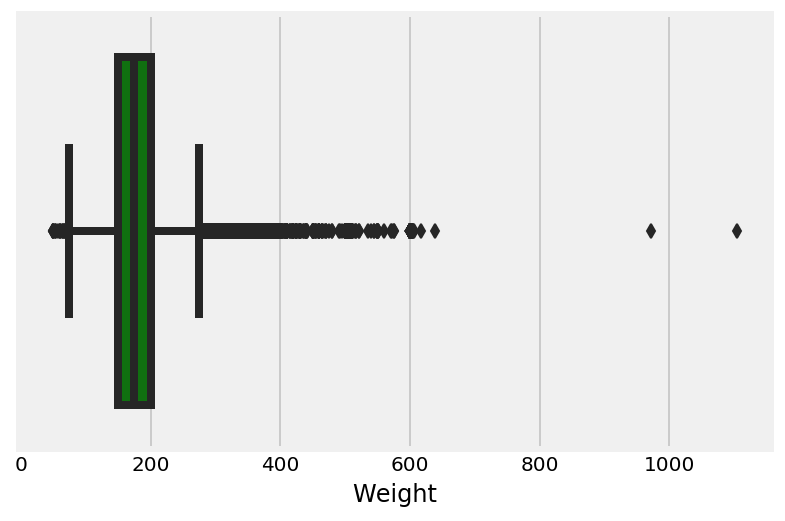

In [67]:
sns.boxplot(data=df,x=df.Weight,color='green');

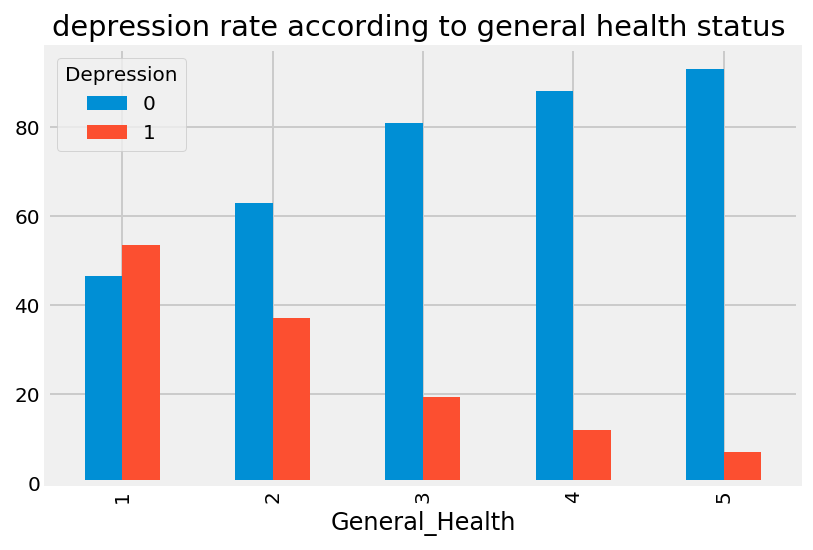

In [68]:
pd.crosstab( df.General_Health,df.Depression ,normalize='index').mul(100).plot(kind='bar');
plt.title('depression rate according to general health status ');


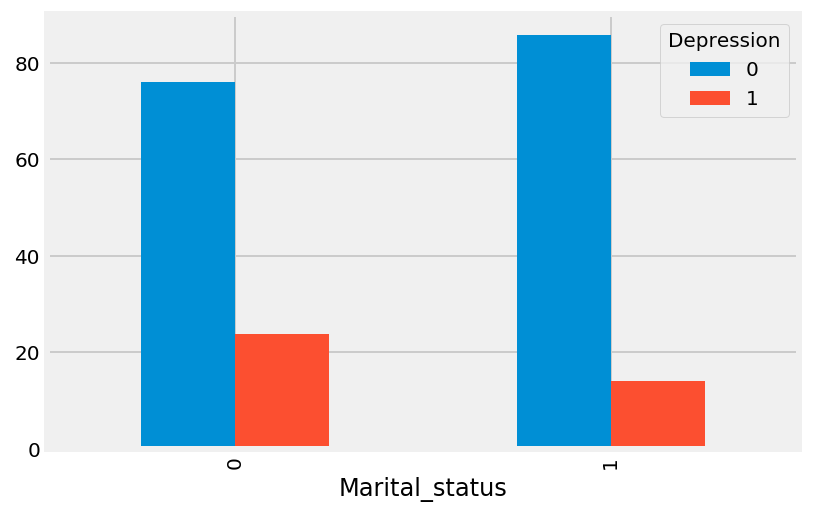

In [69]:
pd.crosstab( df.Marital_status,df.Depression ,normalize='index').mul(100).plot(kind='bar');


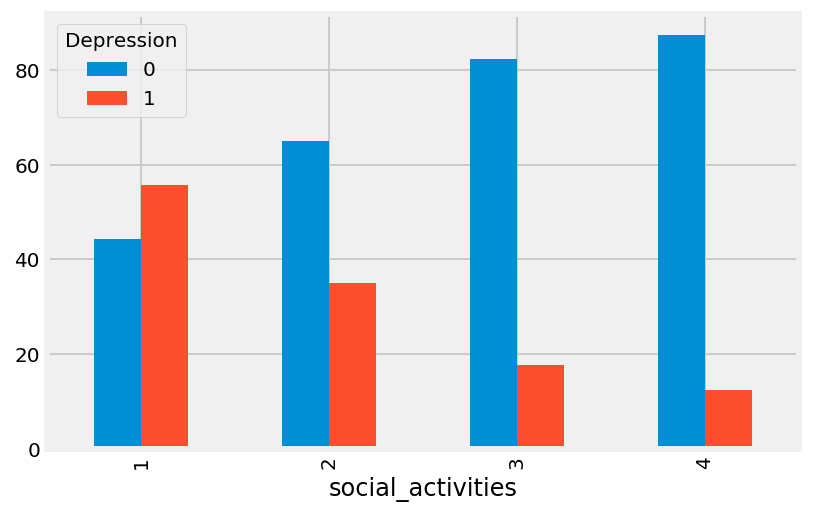

In [70]:
pd.crosstab( df.social_activities,df.Depression ,normalize='index').mul(100).plot(kind='bar');


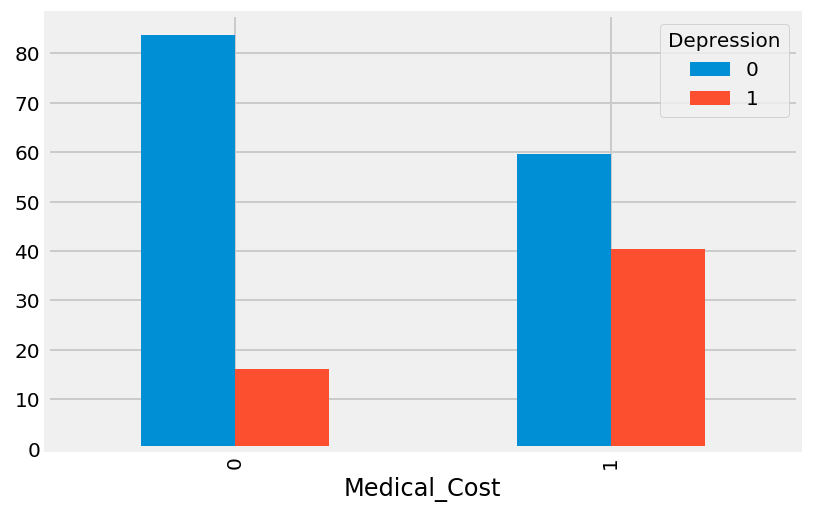

In [71]:
pd.crosstab( df.Medical_Cost,df.Depression ,normalize='index').mul(100).plot(kind='bar');


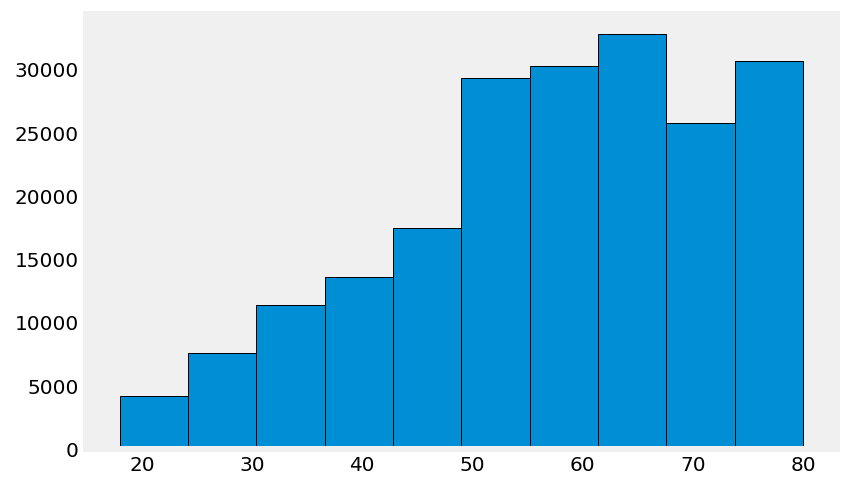

In [72]:
df['Age'].hist(grid=False, edgecolor='#000000');


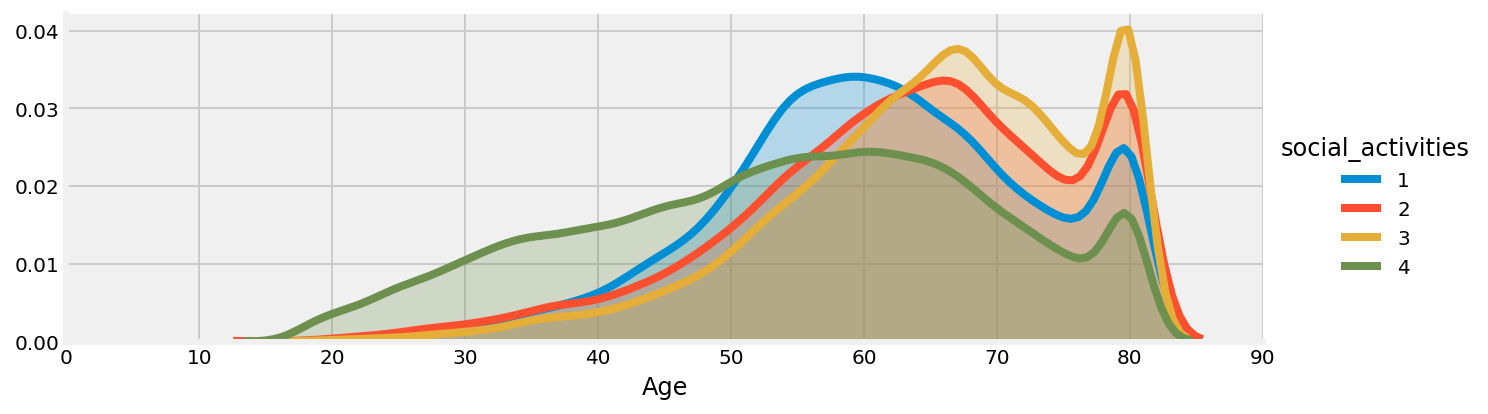

In [73]:
s = sns.FacetGrid(df, hue='social_activities', aspect=3, legend_out=True)
s.map(sns.kdeplot, "Age", shade=True).add_legend()
s.set(xlim=(0, 90));

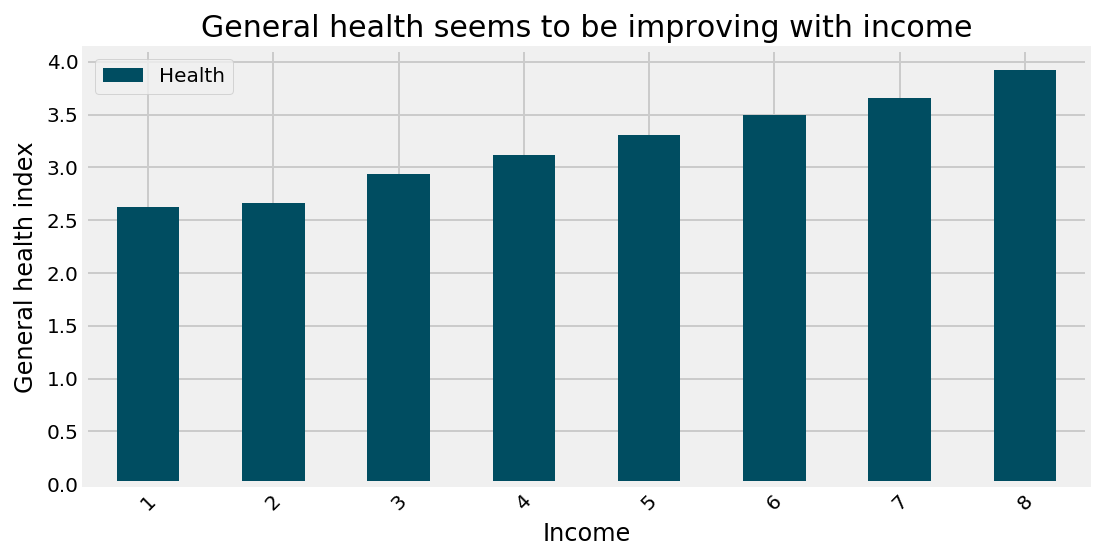

In [74]:

p = df.groupby('Income')[['General_Health']].mean().plot(kind='bar', figsize=(8,4), color='#004d61');


p.set_title('General health seems to be improving with income', fontsize=15)
p.set_xlabel('Income')
p.set_ylabel('General health index')
p.legend(['Health']);
plt.xticks(rotation=45);



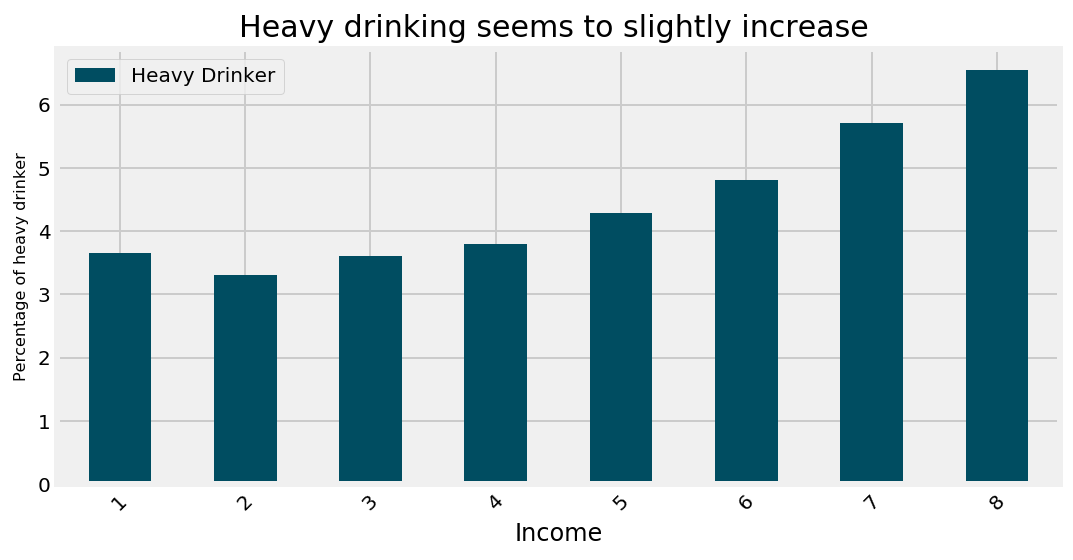

In [75]:
p = df.groupby('Income')[['Heavy_Drinker']].mean().mul(100).plot(kind='bar', figsize=(8,4), color='#004d61');
p.set_title('Heavy drinking seems to slightly increase ', fontsize=15,)
p.set_xlabel('Income')
p.set_ylabel('Percentage of heavy drinker', fontsize=8)
plt.xticks(rotation=45)
p.legend(['Heavy Drinker']);

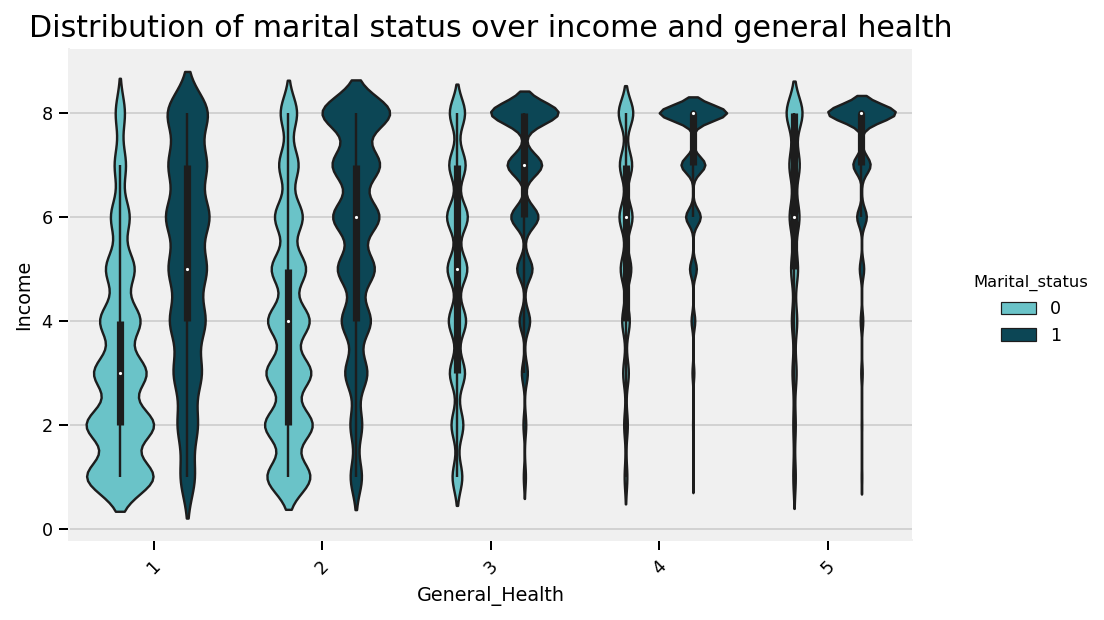

In [76]:
sns.set_context("paper");
x = sns.catplot(x="General_Health", y="Income", hue="Marital_status", palette=["#5bd1d7", "#004d61"], kind="violin", data=df);
plt.title('Distribution of marital status over income and general health', fontsize=15)
x.fig.set_figheight(4)
x.fig.set_figwidth(8)
plt.xticks(rotation=45);



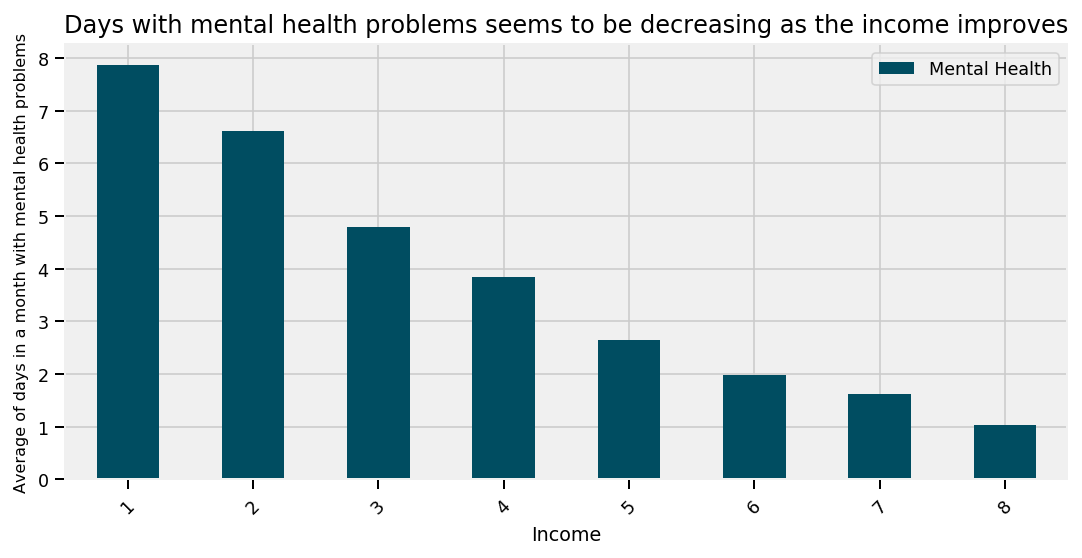

In [77]:
p = df.groupby('Income')[['Mental_Health']].mean().plot(kind='bar', figsize=(8,4), color='#004d61');
p.set_title('Days with mental health problems seems to be decreasing as the income improves', fontsize=12,)
p.set_xlabel('Income')
p.set_ylabel('Average of days in a month with mental health problems', fontsize=8)
plt.xticks(rotation=45)
p.legend(['Mental Health']);

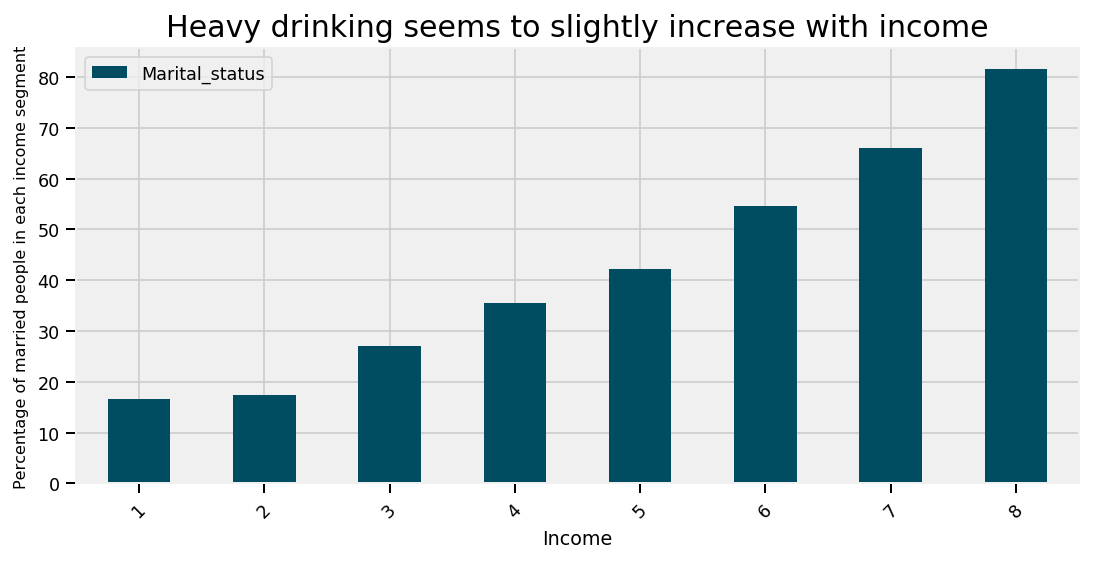

In [78]:
p = df.groupby('Income')[['Marital_status']].mean().mul(100).plot(kind='bar', figsize=(8,4), color='#004d61');
p.set_title('Heavy drinking seems to slightly increase with income', fontsize=15,)
p.set_xlabel('Income')
plt.xticks(rotation=45)
p.set_ylabel('Percentage of married people in each income segment', fontsize=8)
p.legend(['Marital_status']);

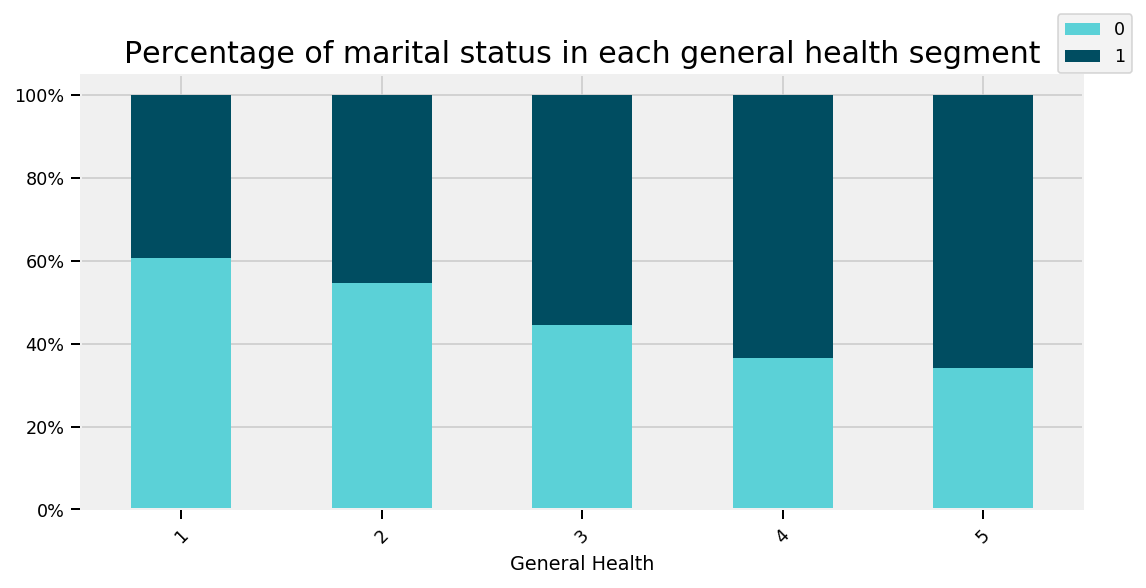

In [79]:
my_colors = ["#5bd1d7", "#004d61"]

p = df.groupby(['General_Health','Marital_status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=my_colors, figsize=(8,4), stacked=True)
p.set_title('Percentage of marital status in each general health segment', fontsize=15, )
p.set_xlabel('General Health')
p.legend(['Marital_status']);
plt.legend(bbox_to_anchor=(1.0,1.0),\
    bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


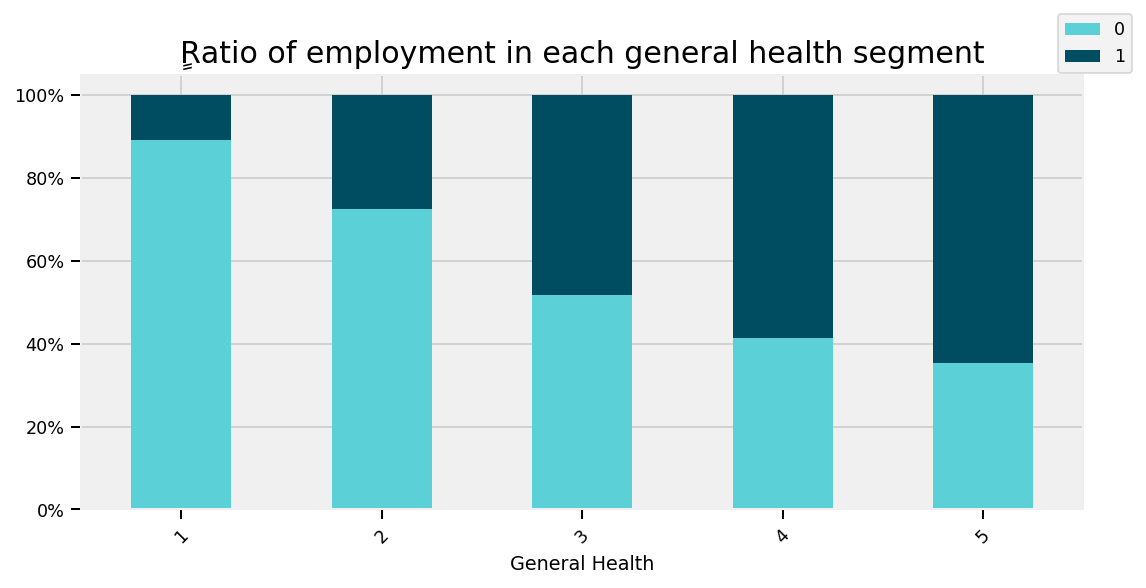

In [80]:
my_colors = ["#5bd1d7", "#004d61"]
p = df.groupby(['General_Health','Employed']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=my_colors, figsize=(8,4), stacked=True)
p.set_title('ٍRatio of employment in each general health segment', fontsize=15, )
p.set_xlabel('General Health')
p.legend(['Employement']);
plt.legend(bbox_to_anchor=(1.0,1.0),\
    bbox_transform=plt.gcf().transFigure)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

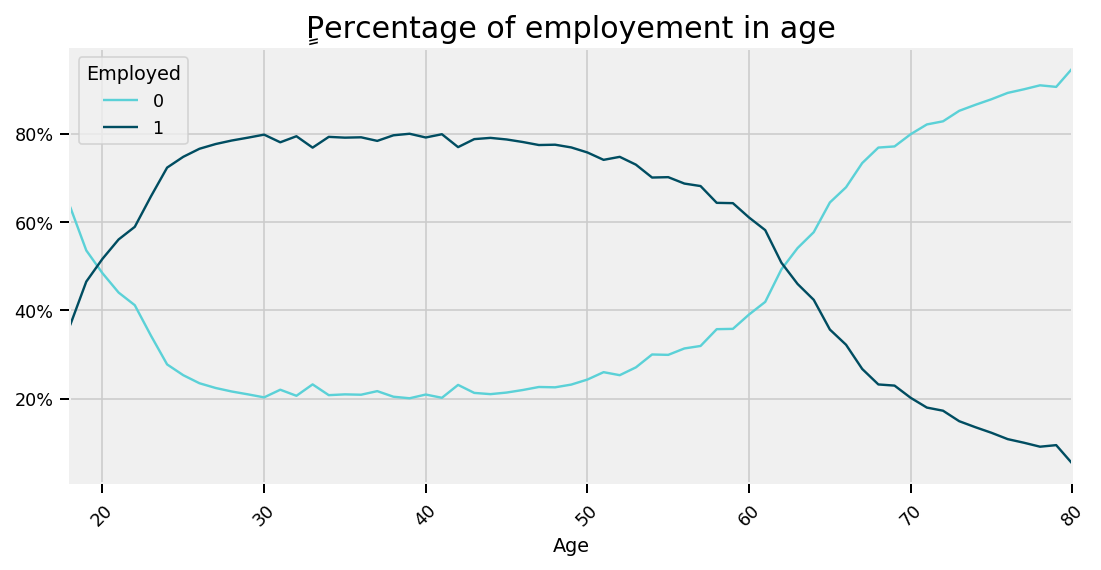

In [81]:
my_colors = ["#5bd1d7", "#004d61"]
p =df.groupby(['Age','Employed']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='line',color=my_colors, figsize=(8,4),stacked=False)
p.set_title('ٍPercentage of employement in age', fontsize=15, )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)


plt.show()




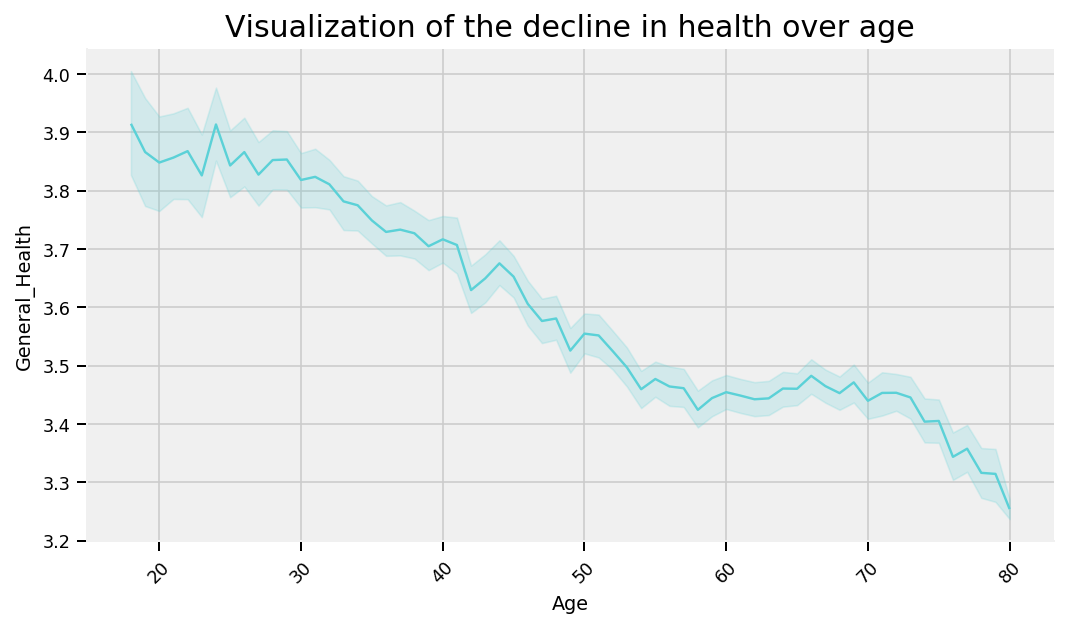

In [82]:

g =sns.relplot(x="Age", y="General_Health", kind="line", data=df, color="#5bd1d7");
sns.set_context("paper", font_scale=1, rc={"lines.linewidth": 1.5});
plt.title('Visualization of the decline in health over age', fontsize=15)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);



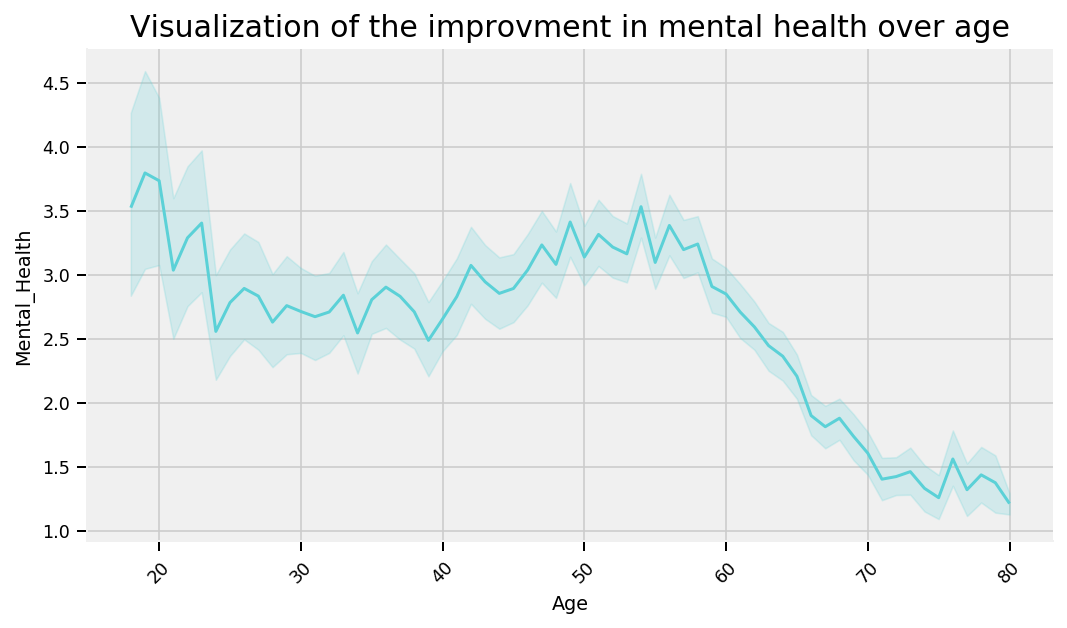

In [83]:
g = sns.relplot(x="Age", y="Mental_Health", kind="line", data=df, color="#5bd1d7");
plt.title('Visualization of the improvment in mental health over age', fontsize=15)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);



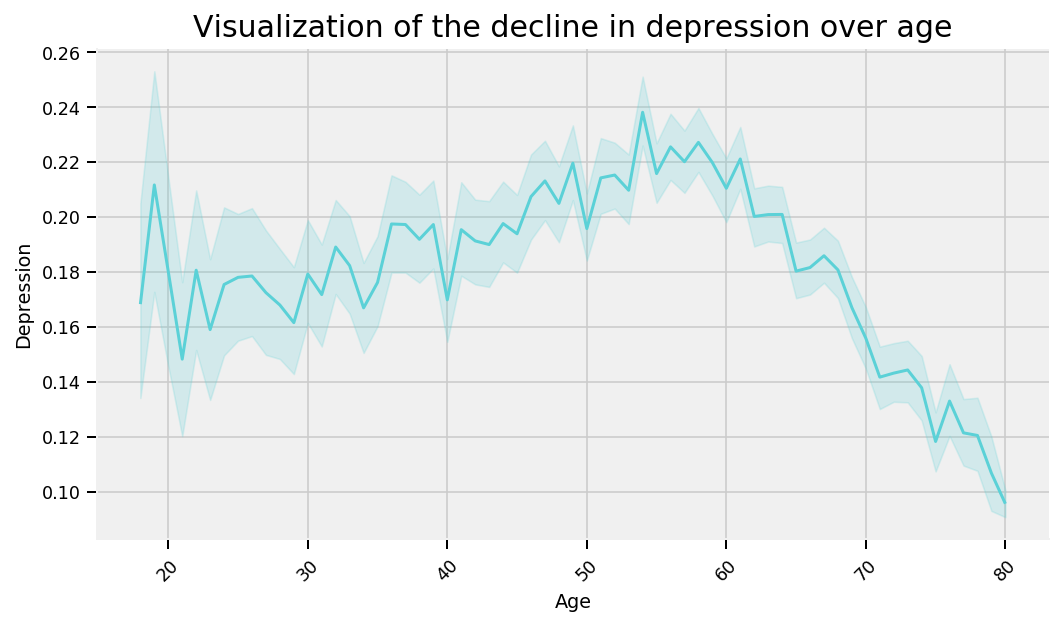

In [84]:
g = sns.relplot(x="Age", y="Depression", kind="line", data=df, color="#5bd1d7");
plt.title('Visualization of the decline in depression over age', fontsize=15)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);



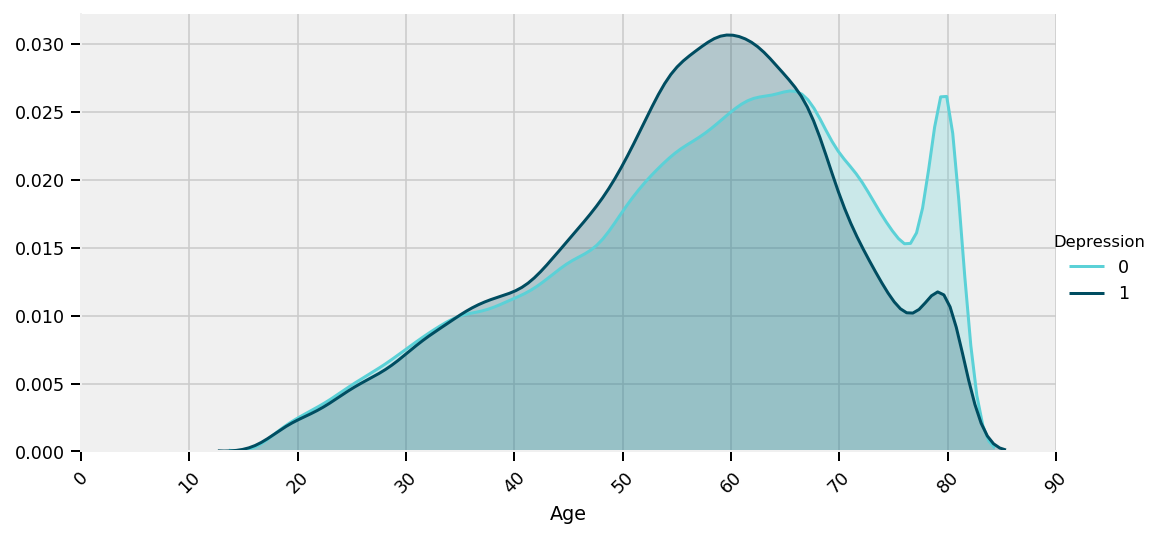

In [85]:
s = sns.FacetGrid(df, hue='Depression',palette=[ "#5bd1d7", "#004d61"], aspect=3, legend_out=True)
s.map(sns.kdeplot, "Age", shade=True).add_legend()
s.set(xlim=(0, 90));
s.fig.set_figheight(4)
s.fig.set_figwidth(8)
plt.xticks(rotation=45);



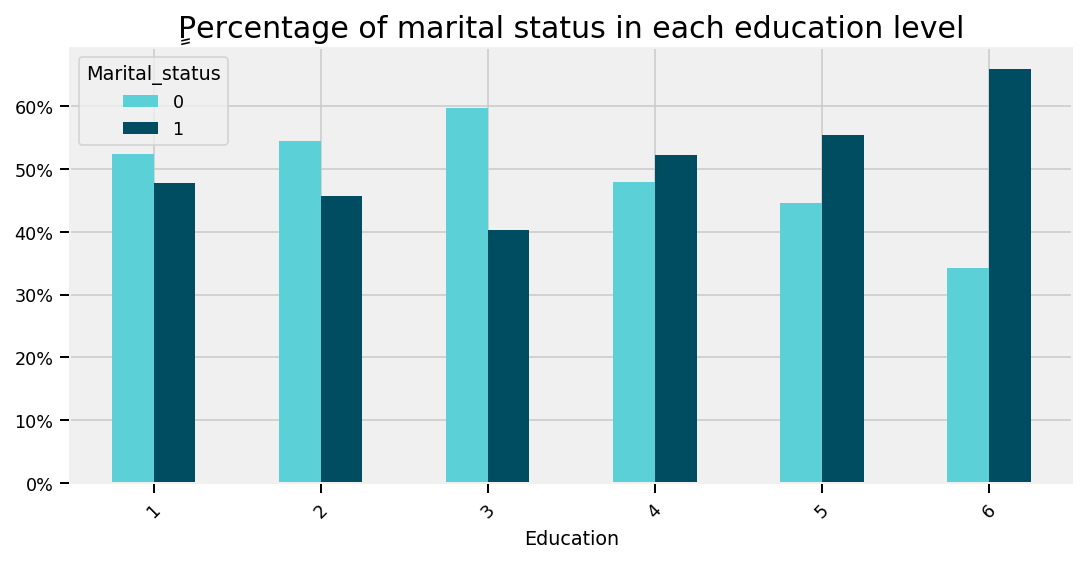

In [86]:
p =df.groupby(['Education','Marital_status']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=my_colors,figsize=(8,4), stacked=False)
p.set_title('ٍPercentage of marital status in each education level', fontsize=15, )
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.xticks(rotation=45)
plt.show()

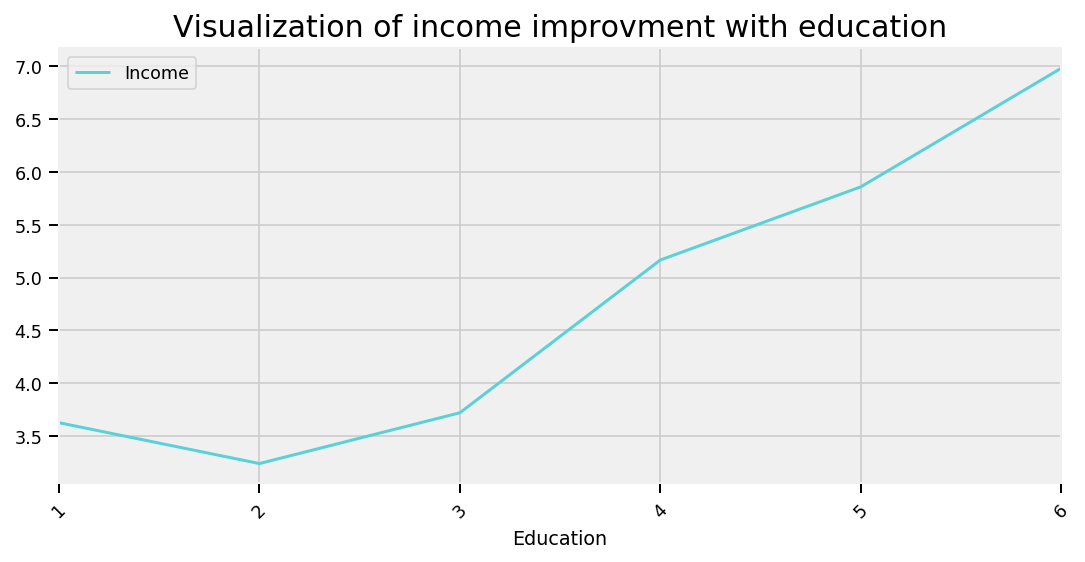

In [87]:
g = df.groupby('Education')[['Income']].mean().plot(kind='line', figsize=(8,4), color=my_colors);
plt.title('Visualization of income improvment with education', fontsize=15);
plt.xticks(rotation=45);

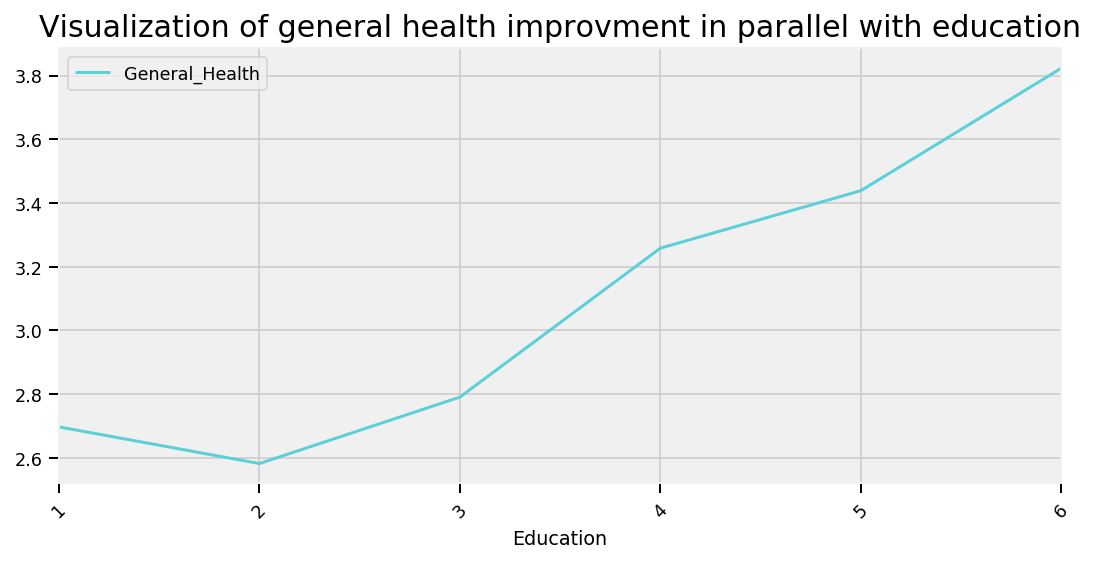

In [88]:
df.groupby('Education')[['General_Health']].mean().plot(kind='line', figsize=(8,4), color=my_colors);
plt.title('Visualization of general health improvment in parallel with education', fontsize=15);
plt.xticks(rotation=45);

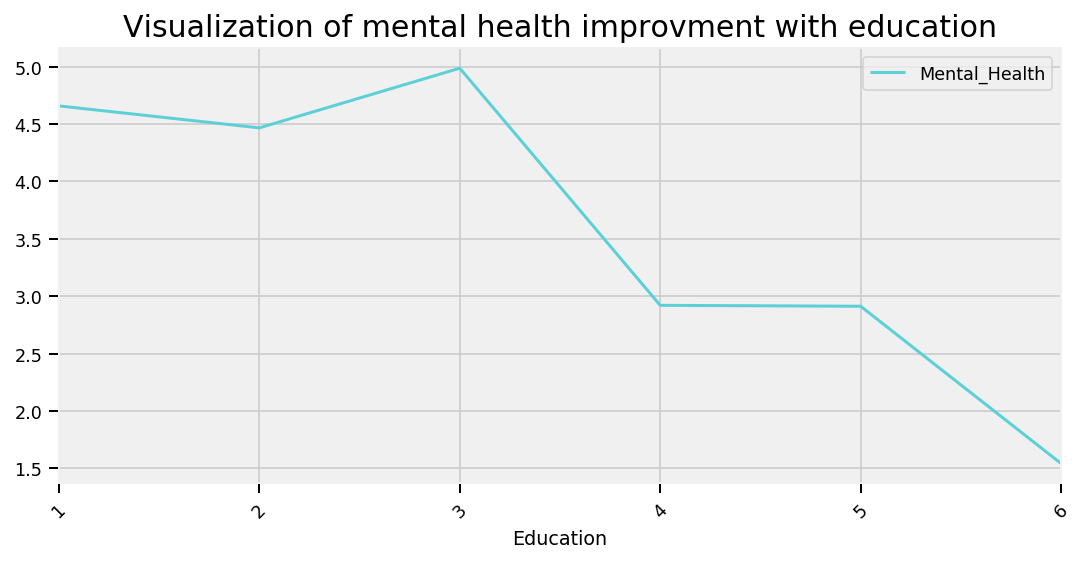

In [89]:
df.groupby('Education')[['Mental_Health']].mean().plot(kind='line', figsize=(8,4), color=my_colors);
plt.title('Visualization of mental health improvment with education', fontsize=15);
plt.xticks(rotation=45);

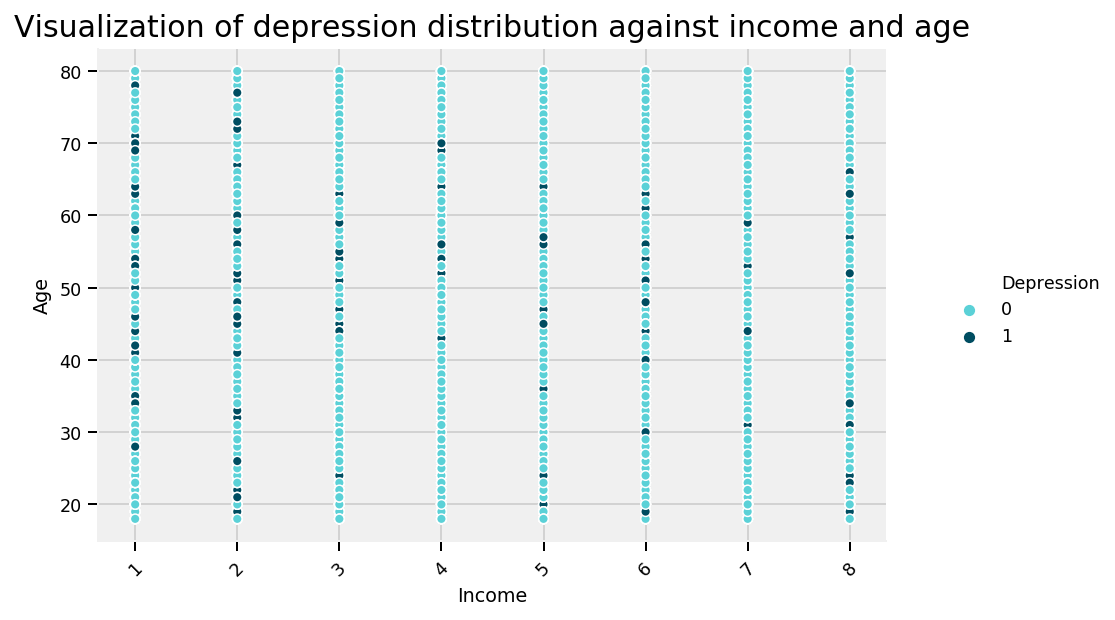

In [90]:
g = sns.relplot(x="Income", y="Age", hue="Depression", palette=[ "#5bd1d7", "#004d61"], data=df);
plt.title('Visualization of depression distribution against income and age', fontsize=15)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);

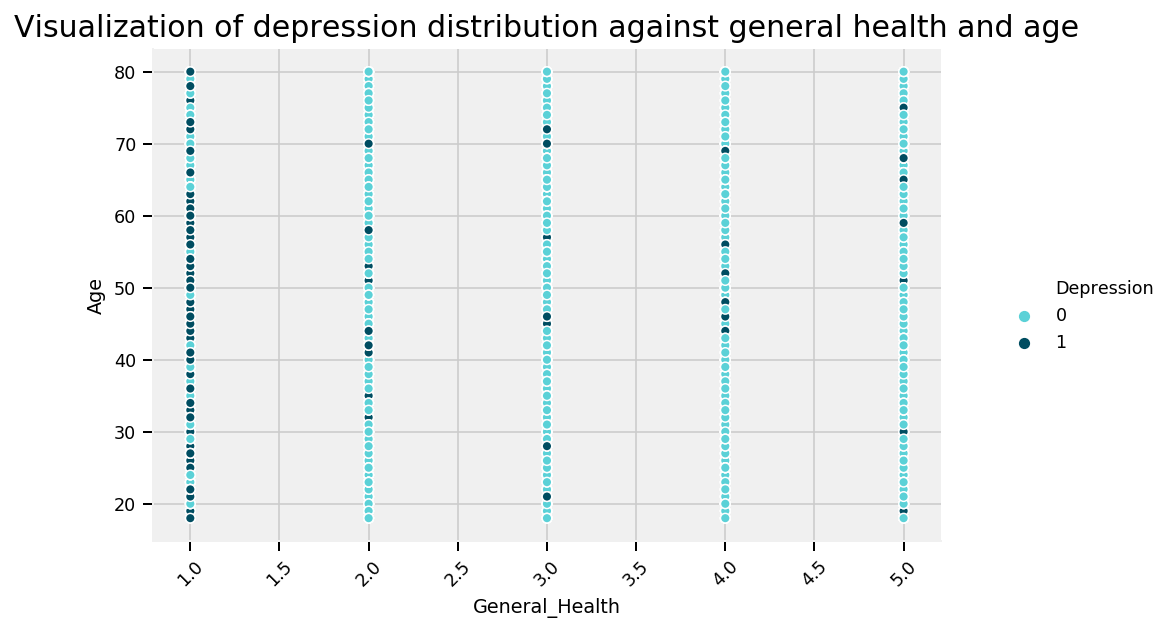

In [91]:
g = sns.relplot(x="General_Health", y="Age", hue="Depression", palette=[ "#5bd1d7", "#004d61"], data=df);
plt.title('Visualization of depression distribution against general health and age', fontsize=15)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);

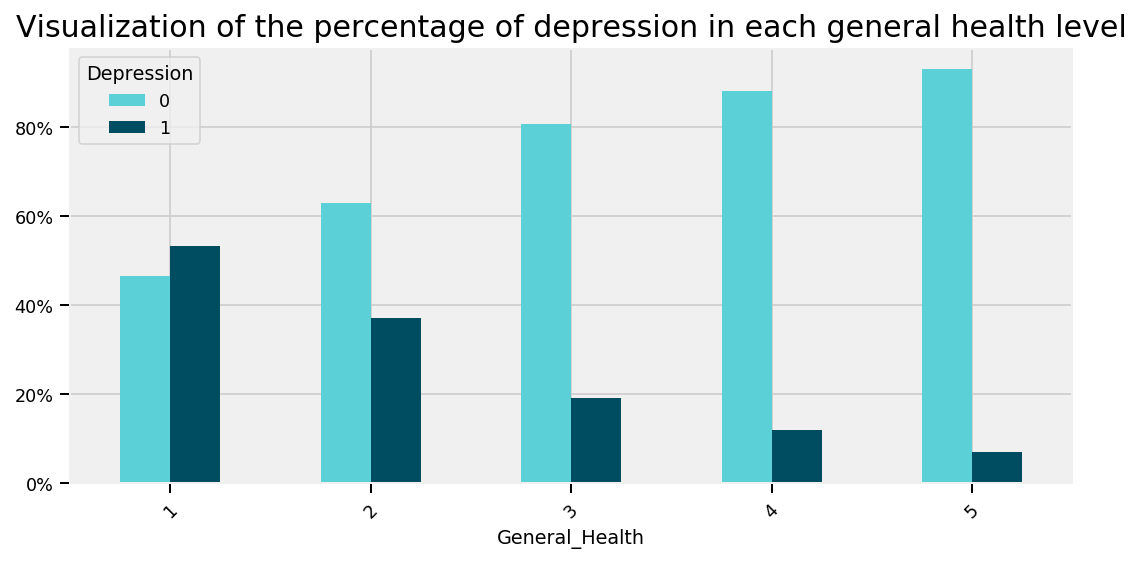

In [92]:
df.groupby(['General_Health','Depression']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=my_colors,figsize=(8,4), stacked=False)
plt.title('Visualization of the percentage of depression in each general health level', fontsize=15);
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

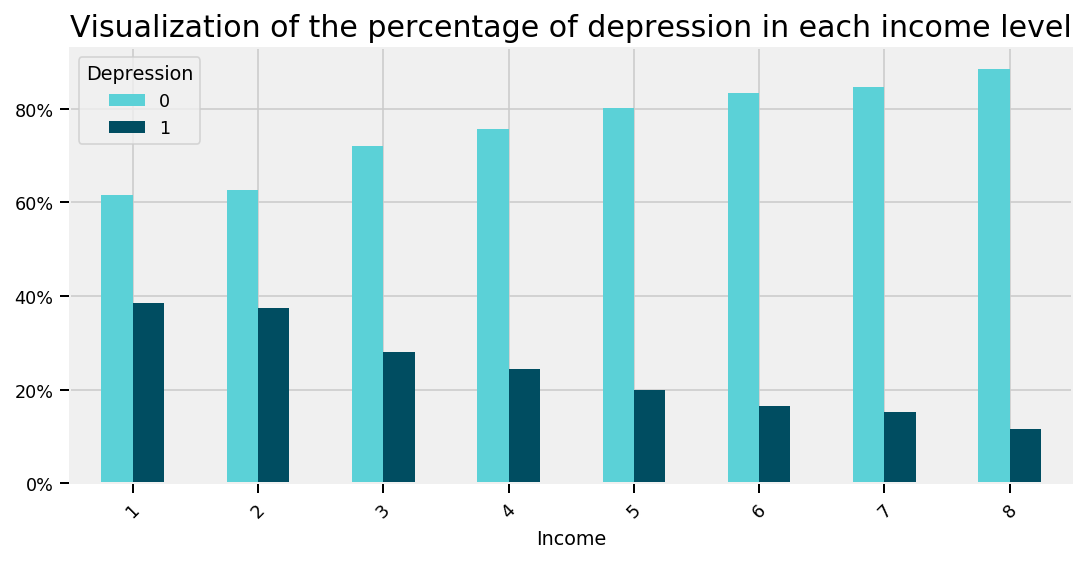

In [93]:
df.groupby(['Income','Depression']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',color=my_colors,figsize=(8,4), stacked=False)
plt.title('Visualization of the percentage of depression in each income level', fontsize=15);
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

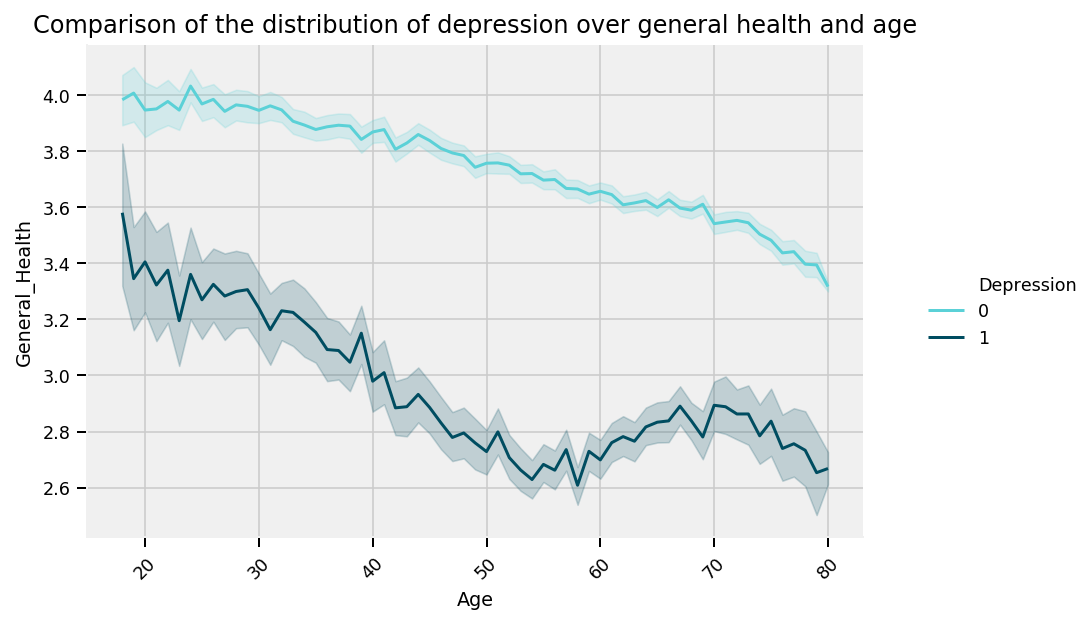

In [94]:
g = sns.relplot(x="Age", y="General_Health", hue="Depression", kind="line",palette=[ "#5bd1d7", "#004d61"], data=df);
plt.title('Comparison of the distribution of depression over general health and age', fontsize=12)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);

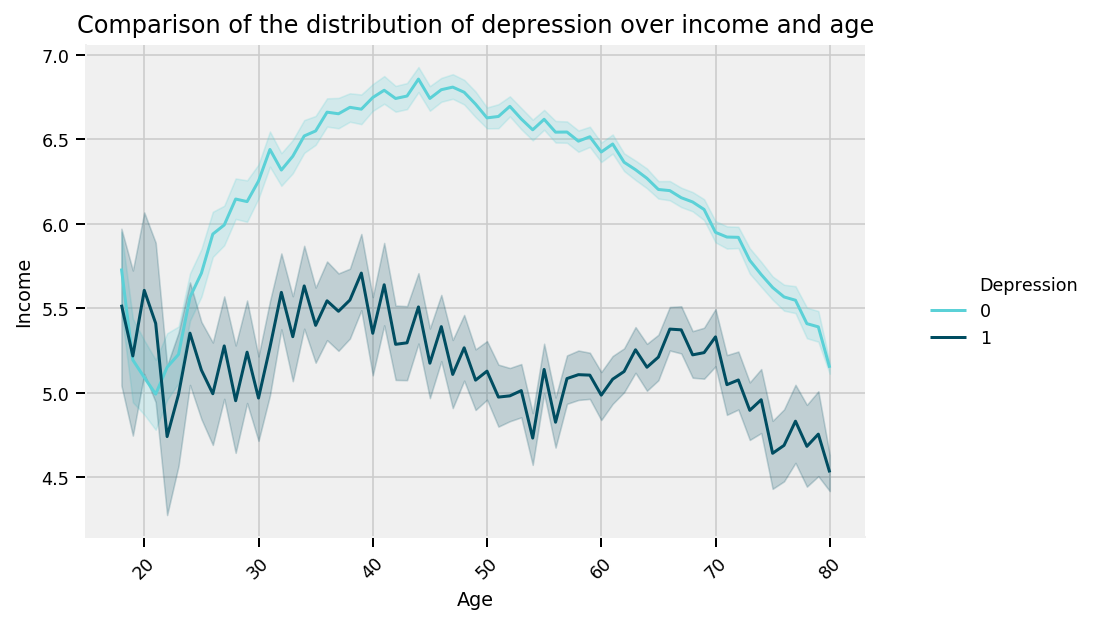

In [95]:
g = sns.relplot(x="Age", y="Income", hue="Depression", kind="line",palette=[ "#5bd1d7", "#004d61"], data=df);
plt.title('Comparison of the distribution of depression over income and age', fontsize=12)
g.fig.set_figheight(4)
g.fig.set_figwidth(8)
plt.xticks(rotation=45);

In [96]:
pandas_profiling.ProfileReport(df)

Number of variables,22
Number of observations,202606
Total Missing (%),0.0%
Total size in memory,19.3 MiB
Average record size in memory,100.0 B
Numeric,10
Categorical,0
Boolean,12
Date,0
Text (Unique),0
Rejected,0


In [97]:
df = pd.get_dummies(df,columns=['Education'])
df = pd.get_dummies(df,columns=['Income'])
df = pd.get_dummies(df,columns=['General_Health'])
df = pd.get_dummies(df,columns=['Smoke'])
df = pd.get_dummies(df,columns=['social_activities'])



In [98]:
df.head()

,Sex,Age,Marital_status,Employed,Weight,Height,Mental_Health,Medical_Cost,High_Blood_Preasure,High_Cholesterol,Heart_Attack,Coronary_Heart_DIS,Stroke,Depression,Diabetes,Heavy_Drinker,Education_1,Education_2,Education_3,Education_4,Education_5,Education_6,Income_1,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,General_Health_1,General_Health_2,General_Health_3,General_Health_4,General_Health_5,Smoke_0,Smoke_1,Smoke_2,Smoke_3,social_activities_1,social_activities_2,social_activities_3,social_activities_4
0,0,63,1,0,280,510,18,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
1,0,52,0,0,165,508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0,63,1,0,180,507,30,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0
5,0,73,0,1,145,502,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0
9,1,68,1,0,161,507,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


### model bulding 
##### (Depression)

In [99]:
feature = ['Sex', 'Heavy_Drinker','Age', 'Marital_status', 'Employed', 'Medical_Cost','Mental_Health','Education_1', 'Education_2',
       'Education_3', 'Education_4','Education_5','Income_1',
       'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6', 'Income_7',
       'General_Health_1', 'General_Health_2', 'General_Health_3',
       'General_Health_4','social_activities_1', 'social_activities_2',
       'social_activities_3']
x = df[feature]
y = df.Depression

In [100]:
df['Depression'].value_counts()

0    165762
1     36844
Name: Depression, dtype: int64

#### train test split 

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)


In [102]:
y_train.value_counts()

0    115974
1     25850
Name: Depression, dtype: int64

In [103]:
y_test.value_counts()

0    49788
1    10994
Name: Depression, dtype: int64

#### LogisticRegression

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# lr = LogisticRegression(class_weight='balanced')

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
conf_matrix = confusion_matrix(predictions,y_test)
ac=metrics.accuracy_score(y_test, predictions)

C:\Users\sfw20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [105]:
conf_matrix


array([[48499,  6998],
       [ 1289,  3996]], dtype=int64)

In [106]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     49788
           1       0.76      0.36      0.49     10994

    accuracy                           0.86     60782
   macro avg       0.82      0.67      0.71     60782
weighted avg       0.85      0.86      0.84     60782



In [107]:
ac

0.863660294166036

In [108]:
metrics.roc_auc_score(y_test,predictions)

0.6687906057686044

In [109]:
#baseline accuracy
1-df.Depression.mean()

0.8181495118604583

#### StandardScaler

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
predictions = lr.predict(X_test)
conf_matrix = confusion_matrix(predictions, y_test)

print(metrics.accuracy_score(y_test, predictions))
print(conf_matrix)
print(metrics.classification_report(y_test, predictions))

C:\Users\sfw20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8491658714751078
[[49033  8413]
 [  755  2581]]
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     49788
           1       0.77      0.23      0.36     10994

    accuracy                           0.85     60782
   macro avg       0.81      0.61      0.64     60782
weighted avg       0.84      0.85      0.81     60782



#### RandomForestClassifier

In [111]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=700,n_jobs = -1).fit(X_train, y_train)
# regressor = RandomForestClassifier(n_estimators=100, random_state=99)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[46237  3551]
 [ 5885  5109]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     49788
           1       0.59      0.46      0.52     10994

    accuracy                           0.84     60782
   macro avg       0.74      0.70      0.71     60782
weighted avg       0.83      0.84      0.84     60782

0.8447566713829753


#### SMOTE

In [113]:
from imblearn.over_sampling import SMOTE
# Separate input features and target
y = df.Depression
X = df.drop('Depression', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)

Using TensorFlow backend.


In [114]:
# smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)
smote=RandomForestClassifier(n_estimators=700).fit(X_train, y_train)
smote_pred = smote.predict(X_test)

print(classification_report(y_test,smote_pred))


              precision    recall  f1-score   support

           0       0.89      0.96      0.92     49777
           1       0.71      0.46      0.55     11005

    accuracy                           0.87     60782
   macro avg       0.80      0.71      0.74     60782
weighted avg       0.86      0.87      0.86     60782



#### neural network

In [115]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [116]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[47475  2302]
 [ 5623  5382]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     49777
           1       0.70      0.49      0.58     11005

    accuracy                           0.87     60782
   macro avg       0.80      0.72      0.75     60782
weighted avg       0.86      0.87      0.86     60782



#### model bulding 2
##### (High Blood Preasure)

In [117]:
features = ['Sex', 'Heavy_Drinker','Age', 'Marital_status', 'Employed', 'Medical_Cost','High_Cholesterol'
        , 'Education_1', 'Education_2', 'Heart_Attack', 'Coronary_Heart_DIS', 'Stroke', 
       'Education_3', 'Education_4','Education_5','Income_1','Diabetes', 
       'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6', 'Income_7',
       'General_Health_1', 'General_Health_2', 'General_Health_3',
       'General_Health_4']
x = df[features]
y = df.High_Blood_Preasure

#### train test split

In [118]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)


#### LogisticRegression

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(predictions,y_test))
print(metrics.accuracy_score(y_test, predictions))

C:\Users\sfw20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[27610 10060]
 [ 7398 15714]]
0.7127768089236945


In [120]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76     35008
           1       0.68      0.61      0.64     25774

    accuracy                           0.71     60782
   macro avg       0.71      0.70      0.70     60782
weighted avg       0.71      0.71      0.71     60782



In [121]:
1-df.High_Blood_Preasure.mean()

0.5730926033779848

#### StandardScaler

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train_std, y_train)
predictions = lr.predict(X_test)
conf_matrix = confusion_matrix(predictions, y_test)

print(metrics.accuracy_score(y_test, predictions))
print(conf_matrix)
print(metrics.classification_report(y_test, predictions))

C:\Users\sfw20\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.4240400118456122
[[    0     0]
 [35008 25774]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35008
           1       0.42      1.00      0.60     25774

    accuracy                           0.42     60782
   macro avg       0.21      0.50      0.30     60782
weighted avg       0.18      0.42      0.25     60782



C:\Users\sfw20\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### RandomForestClassifier

In [123]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier(n_estimators=700,n_jobs = -1).fit(X_train, y_train)
# regressor = RandomForestClassifier(n_estimators=100, random_state=99)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)


In [124]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[25900  9108]
 [10616 15158]]
              precision    recall  f1-score   support

           0       0.71      0.74      0.72     35008
           1       0.62      0.59      0.61     25774

    accuracy                           0.68     60782
   macro avg       0.67      0.66      0.67     60782
weighted avg       0.67      0.68      0.67     60782

0.6754960350103649


##### neural network

In [125]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [126]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[25825  9183]
 [ 8386 17388]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.75     35008
           1       0.65      0.67      0.66     25774

    accuracy                           0.71     60782
   macro avg       0.70      0.71      0.71     60782
weighted avg       0.71      0.71      0.71     60782

